<a href="https://colab.research.google.com/github/m-agnet/Portfolio/blob/main/hyperSphere_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポートに載せるコード

## モンテカルロ法を用いて超球体積を求める手法

In [27]:
# N=2次元球の体積(円の面積)を求める. def, njit, N=2, NTRY=2**20, simulation=1. execution time_s=1s
import random as rd
import math as m
from numba import njit


@njit(cache=True)
def main():
    rd.seed(100)
    DIMENSION: int = 2
    NTRY: int = 2**20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x*x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = (ncnt / NTRY) * (2.0 ** DIMENSION)
    return numerical_volume


numerical_volume = main()
pi = m.pi

print("V =", numerical_volume, ", pi=", pi)

V = 3.1416854858398438 , pi= 3.141592653589793


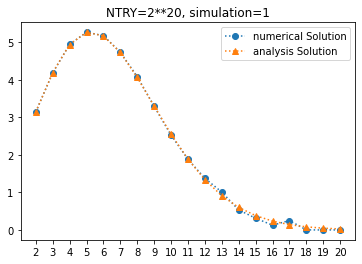

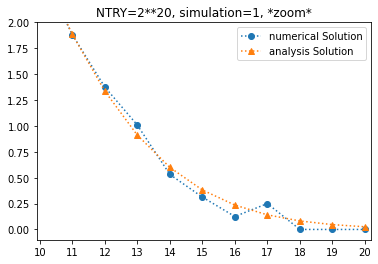

In [3]:
# 各次元ごとの超球体積における数値解と解析解の比較, def, njit, NTRY=2**20, simulation=1. tims=2s
import random as rd
import math as m
from numba import njit

FIRST_DIMENSION: int = 2
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(dimension):
    rd.seed(100)
    numerical_volume: float = 0.0
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for i in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


def NumericalSolution_f():
    numerical_volume_num = [ ]
    dimension_num=[i for i in range(FIRST_DIMENSION, LAST_DIMENSION+1)]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        numerical_volume = CalculateNumericalVolume_f(dimension)
        numerical_volume_num.append(numerical_volume)
    return dimension_num, numerical_volume_num


def AnalysisSolution_f():
    analysis_volume_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        analysisl_volume: float = ((m.pi) ** (dimension / 2.0)) / m.gamma((dimension / 2.0) + 1.0)
        analysis_volume_num.append(analysisl_volume)
    return analysis_volume_num


dimension_num, average_numerical_volume_num = NumericalSolution_f()
analysis_volume_num = AnalysisSolution_f()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(dimension_num, analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.title("NTRY=2**20, simulation=1")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dimension_num, average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(dimension_num, analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.title("NTRY=2**20, simulation=1, *zoom*")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.xlim([9.9,20.2])
plt.ylim([-0.1,2])
plt.legend()
plt.show()

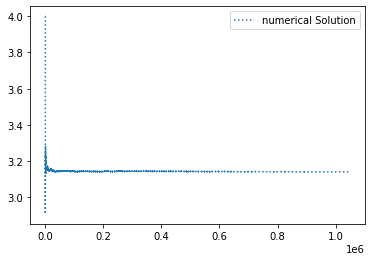

In [4]:
# 2次元のときの体積の推移を求める. NTRY=2**20, simulation=1. execution time_s=1s 
import random as rd
from numba import njit

@njit(cache=True)
def main():
    rd.seed(100)
    DIMENSION: int = 2
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    ni_num = [ ]
    numerical_volume_num = [ ]
    delimiter: int = 1
    for ni in range(1,NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
        if ni % delimiter == 0:
            ni_num.append(ni)
            numerical_volume: float = ncnt / ni * 2.0 ** DIMENSION
            numerical_volume_num.append(numerical_volume)
    return ni_num, numerical_volume_num

ni_num, numerical_volume_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(ni_num, numerical_volume_num, ":", label="numerical Solution", color="tab:blue")  
plt.legend()
plt.show()

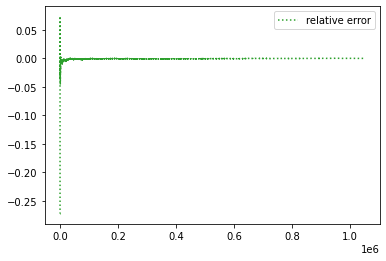

In [5]:
# 2次元のときの相対誤差の推移をグラフ化, def, NTRY=2**20, simulation=1. execution time_s=1s
import random as rd
import math as m
from numba import njit

@njit(cache=True)
def main():
    rd.seed(100)
    DIMENSION: int = 2
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num

dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.legend()
plt.show()

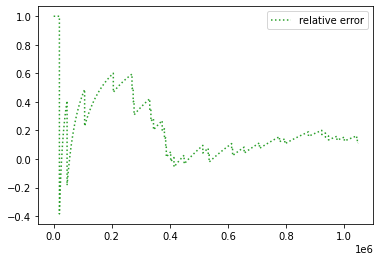

In [6]:
# 14次元のときの相対誤差の推移をグラフ化, def, NTRY=2**20, simulation=1. execution time_s=2s
import random as rd
import math as m
from numba import njit

@njit(cache=True)
def main():
    rd.seed(100)
    DIMENSION: int = 14
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    dimension_num = [ ]
    relative_error_num = [ ]
    delimiter: int = 1
    for ni in range(1, NTRY):
        sum: float = 0.0
        for di in range(DIMENSION):
            x: float = rd.random()
            sum += x * x
        if sum < 1:
            ncnt += 1.0
        if ni % delimiter == 0:
            dimension_num.append(ni)
            numerical_volume = ncnt / ni * 2 ** DIMENSION
            analysis_volume: float = (m.pi ** (DIMENSION / 2.0)) / m.gamma((DIMENSION / 2.0) + 1.0)
            relative_error: float = (analysis_volume - numerical_volume) / analysis_volume
            relative_error_num.append(relative_error)
    return dimension_num, relative_error_num

dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative error", color="tab:green")
plt.legend()
plt.show()

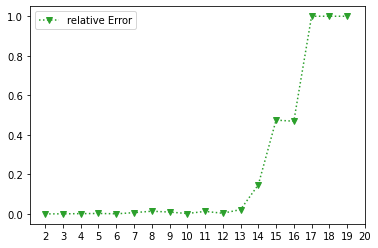

In [7]:
# 各次元の相対誤差のグラフ. NTRY=2**20, simulation=1. execution time_s=3s
import random as rd
import math as m
from numba import njit

FIRST_DIMENSION: int = 2
LAST_DIMENSION: int = 20


@njit(cache=True)
def main():
    rd.seed(100)
    NTRY: int = 2 ** 20
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION, LAST_DIMENSION):
        numerical_volume: float = 0.0
        ncnt: float = 0.0
        for ni in range(NTRY):
            Sum: float = 0.0
            for di in range(dimension):
                x = rd.random()
                Sum += x * x
            if Sum < 1.0:
                ncnt += 1
        numerical_volume = ncnt / NTRY * 2.0 ** dimension
        analysis_volume: float = ((m.pi) ** (dimension / 2.0)) / m.gamma((dimension / 2.0) + 1.0)
        relative_error: float = m.fabs((analysis_volume - numerical_volume)/analysis_volume)
        dimension_num.append(dimension)
        relative_error_num.append(relative_error)
        # print("N :",dimension,", RelativeError =",relative_error)
    return dimension_num, relative_error_num

dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative Error", marker="v", color="tab:green")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

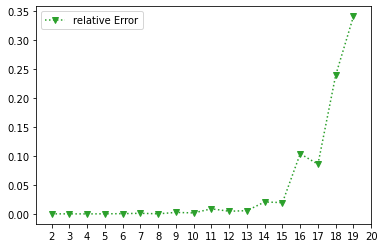

In [8]:
# 各次元の相対誤差のグラフ. NTRY=2**25, simulation=1. execution time_s=50s
import random as rd
import math as m
from numba import njit
from tqdm.auto import tqdm

FIRST_DIMENSION: int = 2
LAST_DIMENSION: int = 20


@njit(cache=True)
def main():
    rd.seed(100)
    NTRY: int = 2 ** 25
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION, LAST_DIMENSION):
        numerical_volume: float = 0.0
        ncnt: float = 0.0
        for ni in range(NTRY):
            Sum: float = 0.0
            for di in range(dimension):
                x = rd.random()
                Sum += x * x
            if Sum < 1.0:
                ncnt += 1
        numerical_volume = ncnt / NTRY * 2.0 ** dimension
        analysis_volume: float = ((m.pi) ** (dimension / 2.0)) / m.gamma((dimension / 2.0) + 1.0)
        relative_error: float = m.fabs((analysis_volume - numerical_volume)/analysis_volume)
        dimension_num.append(dimension)
        relative_error_num.append(relative_error)
        # print("N :",dimension,", RelativeError =",relative_error)
    return dimension_num, relative_error_num

dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num, relative_error_num, ":", label="relative Error", marker="v", color="tab:green")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

## シミュレーション回数を増やして, 数値解の平均値を, より精度のよい数値解とする.

In [1]:
# N=2次元球の体積を計算. def, njit, N=2, NTRY=2**20, simulation=100. execution time_s=4.2s
import random as rd
import numpy as np
from numba import njit


@njit(cache=True)
def main():
    dimension: int = 2
    NTRY: int = 2 ** 20
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in (range(FIRST_SEED, LAST_SEED)):
        rd.seed(si)
        ncnt: float = 0.0
        for ni in range(NTRY):
            sum: float = 0.0
            for di in range(dimension):
                x: float = rd.random()
                sum += x * x
            if sum < 1.0:
                ncnt += 1.0
        numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
        numerical_volume_num.append(numerical_volume)
    average_numerical_volume: float =np.average(numerical_volume_num)
    return dimension, average_numerical_volume


dimension, average_numerical_volume = main()

print("N=", dimension, ",V=", average_numerical_volume)

N= 2 ,V= 3.1419740295410157


In [6]:
# N=2次元球の体積を計算. def, njit, N=2, NTRY=2**20, simulation=100. execution time_s=3.0
import random as rd
import numpy as np
from numba import njit


@njit(cache=True)
def CalculateNumericalVolume(si):
    rd.seed(si)
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


@njit(cache=True)
def main():
    dimension: int = 2
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in (range(FIRST_SEED, LAST_SEED)):
        numerical_volume = CalculateNumericalVolume(si)
        numerical_volume_num.append(numerical_volume)
    average_numerical_volume: float =np.average(numerical_volume_num)
    return dimension, average_numerical_volume


dimension, average_numerical_volume = main()

print("N=", dimension, ",V=", average_numerical_volume)

N= 2 ,V= 3.1419740295410157


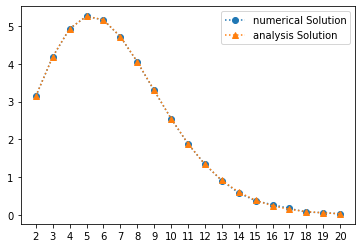

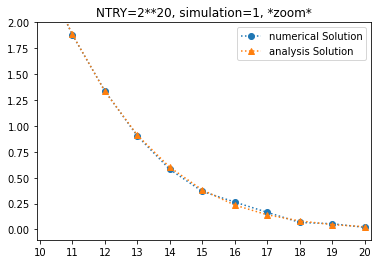

In [8]:
# 各次元ごとの超球体積における数値解と解析解をグラフ化, NTRY=2**20, simulation=100. execution time_s=162s
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 2
LAST_DIMENSION: int = 20


@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    rd.seed(si)
    numerical_volume: float = 0.0
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


def NumericalSimulations_f(dimension):
    numerical_volume_num=[ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume=CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
    return numerical_volume_num


def AverageNumericalSolution_f():
    average_numerical_volume_num = [ ]
    dimension_num=[i for i in range(FIRST_DIMENSION, LAST_DIMENSION+1)]
    for dimension in range(FIRST_DIMENSION, LAST_DIMENSION+1):
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume_num.append(np.average(numerical_volume_num))
    return dimension_num, average_numerical_volume_num


def AnalysisSolution_f():
    analysis_volume_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        analysis_volume = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        analysis_volume_num.append(analysis_volume)
    return analysis_volume_num

dimension_num, average_numerical_volume_num = AverageNumericalSolution_f()
analysis_volume_num = AnalysisSolution_f()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(dimension_num,analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.title("NTRY=2**20, simulation=100")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(dimension_num, average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(dimension_num, analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.title("NTRY=2**20, simulation=100, *zoom*")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.xlim([9.9,20.2])
plt.ylim([-0.1,2])
plt.legend()
plt.show()

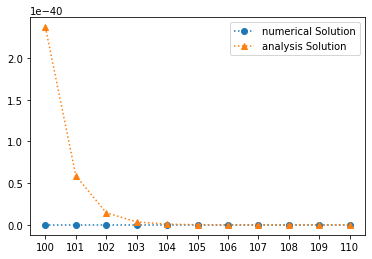

In [11]:
# 各次元ごとの超球体積における数値解と解析解をグラフ化, def,njit, dimension=100-110, NTRY=2**20,simulation=100. execution time_s=8min20s
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 100
LAST_DIMENSION: int = 110

@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    rd.seed(si)
    numerical_volume: float = 0.0
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    for ni in range(NTRY):
        sum: float = 0.0
        for di in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


def NumericalSimulations_f(dimension):
    numerical_volume_num=[ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED):
        numerical_volume=CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
    return numerical_volume_num


def AverageNumericalSolution_f():
    average_numerical_volume_num = [ ]
    inum=[i for i in range(FIRST_DIMENSION, LAST_DIMENSION+1)]
    for dimension in range(FIRST_DIMENSION, LAST_DIMENSION+1):
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume_num.append(np.average(numerical_volume_num))
    return inum, average_numerical_volume_num


def AnalysisSolution_f():
    analysis_volume_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        analysis_volume = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        analysis_volume_num.append(analysis_volume)
    return analysis_volume_num

inum, average_numerical_volume_num = AverageNumericalSolution_f()
analysis_volume_num = AnalysisSolution_f()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(inum,average_numerical_volume_num, ":", label="numerical Solution", marker="o", color="tab:blue")  
plt.plot(inum,analysis_volume_num, ":", label="analysis Solution", marker="^", color="tab:orange")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

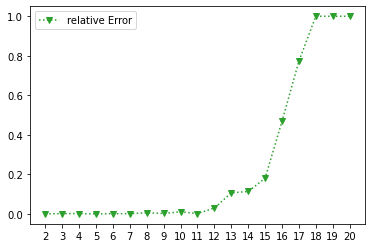

In [12]:
# 各次元ごとの解析解と数値解との相対誤差をグラフ化, NTRY=2**20, simulation=100. execution time_s=1.3s
import random as rd
import math as m
import numpy as np
from numba import njit

FIRST_DIMENSION: int = 2
LAST_DIMENSION: int = 20

@njit(cache=True)
def CalculateNumericalVolume_f(si, dimension):
    NTRY: int = 2 ** 20
    ncnt: float = 0.0
    rd.seed(si)
    for i in range(NTRY):
        sum: float = 0.0
        for _ in range(dimension):
            x: float = rd.random()
            sum += x * x
        if sum < 1.0:
            ncnt += 1.0
    numerical_volume: float = ncnt / NTRY * 2.0 ** dimension
    return numerical_volume


def NumericalSimulations_f(dimension):
    numerical_volume_num = [ ]
    FIRST_SEED: int = 100
    LAST_SEED: int = 200
    for si in range(FIRST_SEED,LAST_SEED+1):
        numerical_volume = CalculateNumericalVolume_f(si, dimension)
        numerical_volume_num.append(numerical_volume)
        return numerical_volume_num


def CalculateRelativeError_f():
    dimension_num = [ ]
    relative_error_num = [ ]
    for dimension in range(FIRST_DIMENSION,LAST_DIMENSION+1):
        dimension_num.append(dimension)
        numerical_volume_num = NumericalSimulations_f(dimension)
        average_numerical_volume: float = np.average(numerical_volume_num)
        analysis_volume: float = ((m.pi) ** (dimension / 2)) / m.gamma((dimension / 2) + 1)
        # print("dimension :", dimension, ", analysis_volume = ", analysis_volume, ", average_numerical_volume = ", average_numerical_volume)
        relative_error: float = m.fabs((analysis_volume - average_numerical_volume) / analysis_volume)
        relative_error_num.append(relative_error)
        # print("dimension :", dimension, ", RelativeError = ", relative_error)
    return dimension_num, relative_error_num
    

def main():
    dimension_num, relative_error_num = CalculateRelativeError_f()
    return dimension_num, relative_error_num

dimension_num, relative_error_num = main()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(dimension_num,relative_error_num, ":", label="relative Error", marker="v", color="tab:green")
plt.xticks([i for i in range(FIRST_DIMENSION,LAST_DIMENSION+1)])
plt.legend()
plt.show()

## 他のアルゴリズム

In [26]:
# grid point法, N=2次元球の体積(円の面積)を求める. def, njit, N=2, NTRY=2**20, simulation=1. execution time_s=0s
import numpy as np

DIMENSION = 2


def main():
    ncnt = 0
    SQRT_NTRY = 1000
    NTRY = SQRT_NTRY ** 2
    for x in range(SQRT_NTRY):
        x = x * (1 / (SQRT_NTRY - 1))
        for y in range(SQRT_NTRY):
            y = y * (1 / (SQRT_NTRY - 1))
            point_num = [ ]
            sum: float = 0.0
            point_num.append(x)
            point_num.append(y)
            sum += np.sum([i**2 for i in point_num])
            if sum <= 1:
                ncnt += 1
    volume = (ncnt / NTRY) * (2.0 ** DIMENSION)
    return volume


volume = main()

print(volume)

784789
3.139156
